<a href="https://colab.research.google.com/github/sidagarwal-labs/DSBA-6211---Advance-Business-Analytics/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [ ]:
#read the data
df=pd.read_csv('signal.csv')
df.describe(include='all')

,output_signal,input_signal1,input_signal2
count,600.000000,600.000000,600.000000
mean,0.500000,0.752500,5.005973
std,0.500417,0.433372,0.730789
min,0.000000,0.005000,3.274757
25%,0.000000,0.378750,4.434785
50%,0.500000,0.752500,4.966314
75%,1.000000,1.126250,5.598158
max,1.000000,1.500000,6.735331


<Axes: xlabel='input_signal1', ylabel='input_signal2'>

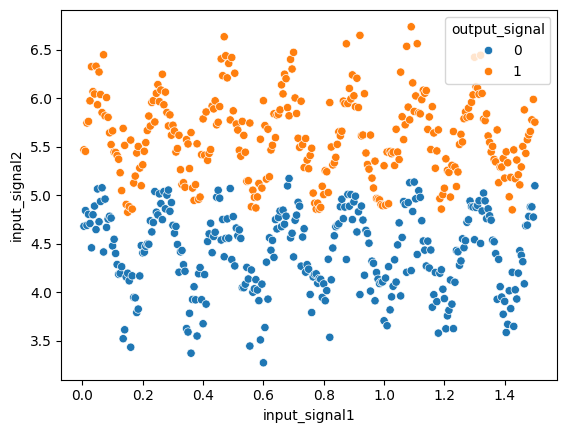

In [ ]:
#visualize the dataset of the 2 features (x,y) and color as the output
#since p = 2, hyperplane is a line
#a straight line would need soft margin since there is mix between 0, 1 (no clear split)
#these have different ranges
sns.scatterplot(data=df,x='input_signal1',y='input_signal2',hue='output_signal')

In [ ]:
#rescale the data to compare the magnitude
#split the data between dependent variable (y) and x

y=df['output_signal']
X=df.drop('output_signal',axis=1)

In [ ]:
X=StandardScaler().fit_transform(X)

In [ ]:
#check the mean and st dev
print(np.mean(X,axis=0))
print(np.std(X, axis=0))

[1.18423789e-16 2.84217094e-16]
[1. 1.]


In [ ]:
#Data partition
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#create linear SVM
linearSVM = SVC(kernel='linear')
linearSVM.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
#check C parameter due to soft margin
linearSVM.C

1.0

In [ ]:
linearSVM.score(X_val, y_val)

0.9277777777777778

In [ ]:
#create a radial SVM
radialSVM=SVC(kernel='rbf')
radialSVM.fit(X_train, y_train)

SVC()

In [ ]:
#check C parameter again
radialSVM.C

1.0

In [ ]:
#check gamma of radial SVM
radialSVM.gamma

'scale'

In [ ]:
#check the score of radial SVM
#ends up being slightly better than the linear SVM model
radialSVM.score(X_val, y_val)

0.9333333333333333

In [ ]:
#setup parameters for the kernel
param = {
    'kernel':['rbf','linear'],
    'C':[0.1, 0.5, 1, 5, 10],
    'gamma':[1, 0.1, 0.01, 0.001]
}

In [ ]:
#run SVM using the parameters
SVM = SVC()
grid=GridSearchCV(estimator=SVM, param_grid=param, verbose=3,cv=10)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.976 total time=   0.0s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 3/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 4/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 5/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.881 total time=   0.0s
[CV 6/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 7/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 8/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 9/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.976 total time=   0.0s
[CV 10/10] END ......C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 1/10] END ....C=0.1, gamma=1, kernel=linear;, score=0.952 total time=   0.0s
[CV 2/10] END ....C=0.1, gamma=1, kernel=linea

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
grid.score(X_val,y_val)

0.9222222222222223